#



In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import pandas_datareader as web
import datetime
import yfinance as yf
import seaborn as sns

In [2]:
# set up which stock we want to analysis
alstom = "ALO.PA"
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now().date()

## Step1. Get the stock historical data

There are many ways to get the stock data:
- yfinance: test success
- tushare: test failed
- pandas_datareader [pandas-datareader](https://pydata.github.io/pandas-datareader/): test failed


In [3]:
# test datareader failed
df = web.DataReader("TSLA", 'yahoo', start, end)

AttributeError: 'NoneType' object has no attribute 'group'

In [4]:
alstom_df=yf.download(alstom,start,end)

[*********************100%%**********************]  1 of 1 completed


### 1.1 Explore the data

In [5]:
# show the first 5 lines
alstom_df.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2015-01-02  24.943159  25.128611  24.711346  24.919977  20.757700   729227
2015-01-05  24.762344  25.054428  24.229172  24.294081  20.236347  1178401
2015-01-06  24.243080  24.715981  24.066902  24.307989  20.247931  1381926
2015-01-07  24.340443  24.827251  24.066902  24.595438  20.487370  1076137
2015-01-08  24.859707  25.235245  24.785524  25.040522  20.858112  1355389

In [6]:
# show the last 5 lines
alstom_df.tail()

Open    High     Low   Close  Adj Close   Volume
Date                                                          
2024-04-30  15.150  15.390  14.740  14.875     14.875  1976678
2024-05-02  14.970  15.745  14.945  15.545     15.545  2319643
2024-05-03  15.625  15.955  15.505  15.555     15.555  1047997
2024-05-06  15.600  15.810  15.500  15.595     15.595   808522
2024-05-07  15.580  15.800  15.285  15.645     15.645  1846136

In [27]:
alstom_df.shape

(2203, 6)

In [28]:
# get the column names
print(alstom_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
# this shows the schema of the dataframe
alstom_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2393 entries, 2015-01-02 to 2024-05-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2393 non-null   float64
 1   High       2393 non-null   float64
 2   Low        2393 non-null   float64
 3   Close      2393 non-null   float64
 4   Adj Close  2393 non-null   float64
 5   Volume     2393 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 130.9 KB


> Unlike spark df, the pandas df has the notion of index. In the above example, the index is date column which has type Datetime

## Step 2. Basic pandas time series functions

In section 3 EDA, we will use some pandas functions which you may not familiar, here we examine them first.
The pandas dataframe provide a list of useful functions which can help us to explore the data
- rolling
- ewm (Exponentially Weighted Moving)
- corr


### 2.1 Rolling function

The rolling function is used for calculating `rolling statistics` over a specified window of data.

Below query will calculate the 7-day rolling average of the closing price

In [30]:
rolling_avg = alstom_df["Close"].rolling(window=7).mean()

In [31]:
rolling_avg.head(10)

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-12    26.660000
2015-01-13    26.726429
2015-01-14    26.813571
2015-01-15    26.910714
Name: Close, dtype: float64

There are two things that worth to mention:
1. The first 6 days have `NaN values` since there is not enough data to calculate a 7-day rolling average. Starting from the 7th day, it will show the rolling average for each subsequent day.
2. The rolling is based on the index, as we use date as index, so window = 7 means 7 day. If the index is year such as 2010, 2011, it will be interpreted as 7 years

## 2.2 Exponentially Weighted Moving

This function is often used to calculate exponentially weighted statistics for a given data series. It is commonly used for smoothing and analyzing `time series data`.

**Exponentially weighted moving averages give more weight to recent observations while gradually decreasing the weight of older observations. This can be useful for capturing trends and patterns in data while reducing the impact of random fluctuations or noise.**

In [32]:
alstom_df['ewm'] = alstom_df['Adj Close'].ewm(span=20,
                                              min_periods=0,
                                              adjust=False,
                                              ignore_na=False).mean()

In [33]:
alstom_df.head(10)

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2015-01-02  26.900000  27.100000  26.650000  26.875000  22.656872   676180   
2015-01-05  26.705000  27.020000  26.129999  26.200001  22.087814  1092679   
2015-01-06  26.145000  26.655001  25.955000  26.215000  22.100460  1281398   
2015-01-07  26.250000  26.775000  25.955000  26.525000  22.361805   997854   
2015-01-08  26.809999  27.215000  26.730000  27.004999  22.766466  1256792   
2015-01-09  27.000000  27.174999  26.705000  26.825001  22.614721   667945   
2015-01-12  26.879999  27.260000  26.785000  26.975000  22.741175   632136   
2015-01-13  26.930000  27.645000  26.840000  27.340000  23.048887   975225   
2015-01-14  27.010000  27.225000  26.610001  26.809999  22.602074   993274   
2015-01-15  26.969999  27.155001  26.200001  26.895000  22.673735  1249846   

                  ewm  
Date                   
2015-01-02  22.656872  
2015-01-05  22.602676  
2015-01-06  22.554846  
2015-01-07  22.536461  
2015-01-08  22.558366  
2015-01-09  22.563733  
2015-01-12  22.580633  
2015-01-13  22.625228  
2015-01-14  22.623023  
2015-01-15  22.627853

The **span** parameter is called the `smoothing parameter`. It defines the weight difference of more recent and less recent observations. The formula of the weight calculation is : **Weight = 2 / (span + 1)**

For example, if we specify `span=3`, it means that the most recent observation is given the highest weight (e.g., approximately 0.5), the observation before that is given a lower weight (e.g., approximately 0.25), and the observation before that is given an even lower weight (e.g., approximately 0.125).

The **number of observations included in the calculation** of the EWMA is calculated with below formula:
**Number of Observations = 2 * span - 1**

In our example, we take span =20, so we have `Number of Observations = 2 * 20 - 1 = 39`

### 2.3 Calculate the correlation between columns(features)



In [48]:
np.random.seed(0)
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100)
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Feature1  Feature2  Feature3
Feature1  1.000000 -0.066107 -0.036512
Feature2 -0.066107  1.000000 -0.124047
Feature3 -0.036512 -0.124047  1.000000


<Axes: >

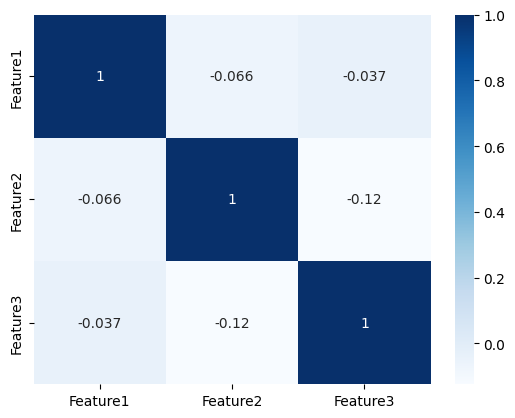

In [51]:
# we can visualize the correlation matrix in a heat map
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')

## 3. EDA



We will make some new columns first

In [34]:
# this column calculate the
day_high_low_diff = "high_low_diff"
alstom_df[day_high_low_diff]= alstom_df["High"] - alstom_df ["Low"]

There is a difference between closing price and Adjusted closing price of a stock. Because the company may offer dividend or new shares.

`A dividend` reduces the value of stocks since it is recognised as capital lost from the company. A dividend is declared when a company rewards its shareholders with additional cash on every share, or by providing an extra percentage of shares.

To raise capital, a company may offer `new shares`. It may do so in a rights issue by providing the new shares to the existing investors at a reduced price. Similar to stock splits, new offerings lead to a fall in each share price as they own a lesser percentage of the company’s total stock

To make the day diff more accurate, we use the adjusted closing price

In [35]:
day_diff = "day_diff"
alstom_df[day_diff] = alstom_df["Adj Close"] - alstom_df["Open"]

In [36]:
mean_3d = "3d_mean"
mean_10d = "10d_mean"
mean_30d = "30d_mean"
std_dev_ac = "adj_close_5d_std_dev"

alstom_df[mean_3d] = alstom_df["Adj Close"].shift(1).rolling(window=3).mean()
alstom_df[mean_10d] = alstom_df["Adj Close"].shift(1).rolling(window=10).mean()
alstom_df[mean_30d] = alstom_df["Adj Close"].shift(1).rolling(window=30).mean()
alstom_df[std_dev_ac] = alstom_df["Adj Close"].rolling(5).std()

In [37]:
alstom_df.head(10)

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2015-01-02  26.900000  27.100000  26.650000  26.875000  22.656872   676180   
2015-01-05  26.705000  27.020000  26.129999  26.200001  22.087814  1092679   
2015-01-06  26.145000  26.655001  25.955000  26.215000  22.100460  1281398   
2015-01-07  26.250000  26.775000  25.955000  26.525000  22.361805   997854   
2015-01-08  26.809999  27.215000  26.730000  27.004999  22.766466  1256792   
2015-01-09  27.000000  27.174999  26.705000  26.825001  22.614721   667945   
2015-01-12  26.879999  27.260000  26.785000  26.975000  22.741175   632136   
2015-01-13  26.930000  27.645000  26.840000  27.340000  23.048887   975225   
2015-01-14  27.010000  27.225000  26.610001  26.809999  22.602074   993274   
2015-01-15  26.969999  27.155001  26.200001  26.895000  22.673735  1249846   

                  ewm  high_low_diff  day_diff    3d_mean  10d_mean  30d_mean  \
Date                                                                            
2015-01-02  22.656872       0.450001 -4.243128        NaN       NaN       NaN   
2015-01-05  22.602676       0.890001 -4.617186        NaN       NaN       NaN   
2015-01-06  22.554846       0.700001 -4.044540        NaN       NaN       NaN   
2015-01-07  22.536461       0.820000 -3.888195  22.281715       NaN       NaN   
2015-01-08  22.558366       0.485001 -4.043533  22.183360       NaN       NaN   
2015-01-09  22.563733       0.469999 -4.385279  22.409577       NaN       NaN   
2015-01-12  22.580633       0.475000 -4.138824  22.580997       NaN       NaN   
2015-01-13  22.625228       0.805000 -3.881113  22.707454       NaN       NaN   
2015-01-14  22.623023       0.615000 -4.407927  22.801594       NaN       NaN   
2015-01-15  22.627853       0.955000 -4.296265  22.797379       NaN       NaN   

            adj_close_5d_std_dev  
Date                              
2015-01-02                   NaN  
2015-01-05                   NaN  
2015-01-06                   NaN  
2015-01-07                   NaN  
2015-01-08              0.311762  
2015-01-09              0.303357  
2015-01-12              0.282678  
2015-01-13              0.249632  
2015-01-14              0.180109  
2015-01-15              0.183335

In [38]:
alstom_df.describe()

Open         High          Low        Close    Adj Close  \
count  2203.000000  2203.000000  2203.000000  2203.000000  2203.000000   
mean     32.182352    32.547585    31.801640    32.168484    29.362104   
std       7.539197     7.602364     7.492953     7.546779     7.656324   
min      16.424999    16.900000    16.040001    16.205000    16.055342   
25%      26.150000    26.440001    25.877500    26.190001    23.019529   
50%      31.155001    31.500000    30.750000    31.129999    28.522863   
75%      38.355000    38.650000    37.990002    38.345995    34.706961   
max      49.009998    50.639999    48.580002    50.299999    48.966671   

             Volume          ewm  high_low_diff     day_diff      3d_mean  \
count  2.203000e+03  2203.000000    2203.000000  2203.000000  2200.000000   
mean   1.082313e+06    29.344175       0.745945    -2.820248    29.368122   
std    7.372156e+05     7.558927       0.500914     2.106117     7.650386   
min    0.000000e+00    17.436073       0.000000    -7.114925    16.416922   
25%    6.256355e+05    23.124934       0.439999    -4.664894    23.069471   
50%    9.035830e+05    28.987667       0.610001    -3.379147    28.657190   
75%    1.313486e+06    34.853988       0.870003    -0.762085    34.746402   
max    9.049072e+06    46.022533       6.027157     1.423347    48.022383   

          10d_mean     30d_mean  adj_close_5d_std_dev  
count  2193.000000  2173.000000           2199.000000  
mean     29.382791    29.421995              0.435274  
std       7.632692     7.579080              0.349566  
min      16.941580    17.662243              0.000000  
25%      23.128978    23.177619              0.208371  
50%      28.877425    29.176869              0.339522  
75%      34.644587    34.661546              0.550585  
max      46.650734    45.565939              2.951849

In [39]:
# we can also view it in vertical

alstom_df.describe().T

count          mean            std        min  \
Open                  2203.0  3.218235e+01       7.539197  16.424999   
High                  2203.0  3.254758e+01       7.602364  16.900000   
Low                   2203.0  3.180164e+01       7.492953  16.040001   
Close                 2203.0  3.216848e+01       7.546779  16.205000   
Adj Close             2203.0  2.936210e+01       7.656324  16.055342   
Volume                2203.0  1.082313e+06  737215.586998   0.000000   
ewm                   2203.0  2.934418e+01       7.558927  17.436073   
high_low_diff         2203.0  7.459445e-01       0.500914   0.000000   
day_diff              2203.0 -2.820248e+00       2.106117  -7.114925   
3d_mean               2200.0  2.936812e+01       7.650386  16.416922   
10d_mean              2193.0  2.938279e+01       7.632692  16.941580   
30d_mean              2173.0  2.942199e+01       7.579080  17.662243   
adj_close_5d_std_dev  2199.0  4.352743e-01       0.349566   0.000000   

                                25%            50%           75%           max  
Open                      26.150000      31.155001  3.835500e+01  4.901000e+01  
High                      26.440001      31.500000  3.865000e+01  5.064000e+01  
Low                       25.877500      30.750000  3.799000e+01  4.858000e+01  
Close                     26.190001      31.129999  3.834599e+01  5.030000e+01  
Adj Close                 23.019529      28.522863  3.470696e+01  4.896667e+01  
Volume                625635.500000  903583.000000  1.313486e+06  9.049072e+06  
ewm                       23.124934      28.987667  3.485399e+01  4.602253e+01  
high_low_diff              0.439999       0.610001  8.700027e-01  6.027157e+00  
day_diff                  -4.664894      -3.379147 -7.620850e-01  1.423347e+00  
3d_mean                   23.069471      28.657190  3.474640e+01  4.802238e+01  
10d_mean                  23.128978      28.877425  3.464459e+01  4.665073e+01  
30d_mean                  23.177619      29.176869  3.466155e+01  4.556594e+01  
adj_close_5d_std_dev       0.208371       0.339522  5.505851e-01  2.951849e+00

### 3.1 check the data status

In [44]:
missing_val_count=alstom_df.isnull().sum()
missing_val_count.head(15)

Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
ewm                      0
high_low_diff            0
day_diff                 0
3d_mean                  3
10d_mean                10
30d_mean                30
adj_close_5d_std_dev     4
dtype: int64

<Axes: >

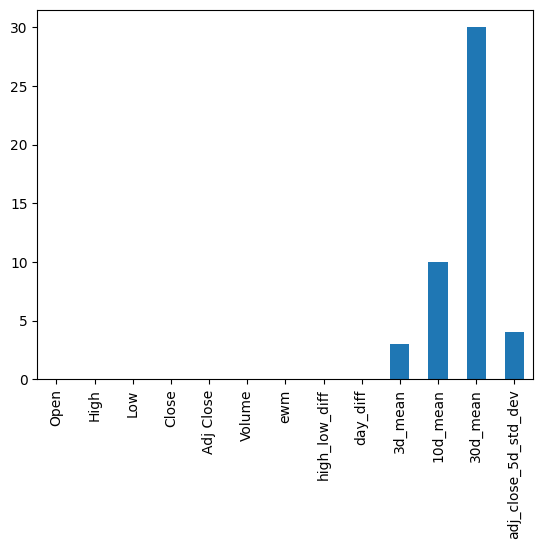

In [45]:
# view the count in a bar plot
missing_val_count.plot.bar()

In [47]:
print("column unique NaN")
for column in alstom_df:

    print("{0:15} {1:6d} {2:6}".format(
        column, alstom_df[column].nunique(),(alstom_df[column]==-1).sum()
    ))

column unique NaN
Open              1623      0
High              1678      0
Low               1678      0
Close             1688      0
Adj Close         1891      0
Volume            2198      0
ewm               2203      0
high_low_diff      631      0
day_diff          2198      0
3d_mean           2163      0
10d_mean          2185      0
30d_mean          2168      0
adj_close_5d_std_dev   2192      0


### 3.2 Calculate the feature correlation

In [59]:
corr_matrix= alstom_df.corr()
corr_matrix.head()

Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.998909  0.998452  0.997707   0.961696 -0.270566   
High       0.998909  1.000000  0.997903  0.998683   0.965123 -0.258464   
Low        0.998452  0.997903  1.000000  0.998827   0.959174 -0.293469   
Close      0.997707  0.998683  0.998827  1.000000   0.963060 -0.277151   
Adj Close  0.961696  0.965123  0.959174  0.963060   1.000000 -0.192983   

                ewm  high_low_diff  day_diff   3d_mean  10d_mean  30d_mean  \
Open       0.947287       0.225008 -0.083633  0.960466  0.952586  0.926249   
High       0.949789       0.249795 -0.067270  0.962077  0.954417  0.929250   
Low        0.941264       0.186591 -0.087263  0.955581  0.946948  0.919023   
Close      0.944284       0.215969 -0.070465  0.957669  0.949418  0.922435   
Adj Close  0.987206       0.299792  0.192728  0.995870  0.989680  0.968641   

           adj_close_5d_std_dev  
Open                   0.171151  
High                   0.187123  
Low                    0.147955  
Close                  0.166257  
Adj Close              0.272976

<Axes: >

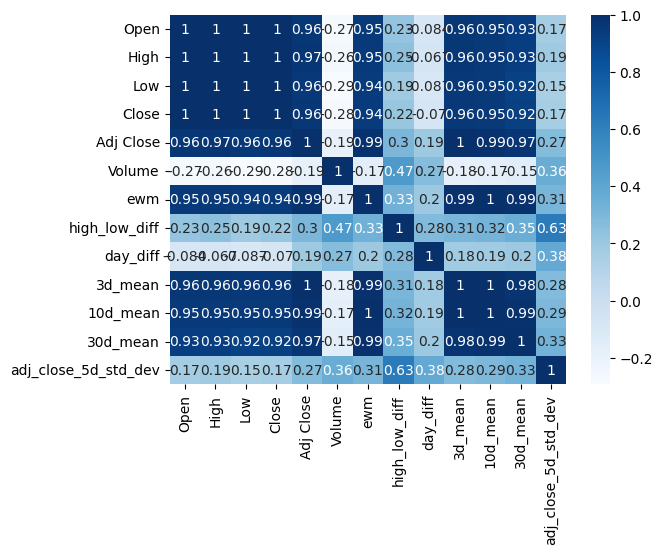

In [60]:
sns.heatmap(corr_matrix,annot=True,cmap='Blues')

### 3.3 get the distribution of each column(feature)


In [66]:
# here we take all columns of the dataset, you can select any column which you want
feature_list = [x for x in list(alstom_df.columns)]
print(feature_list)
feature_list.remove('ewm')
print(feature_list)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ewm', 'high_low_diff', 'day_diff', '3d_mean', '10d_mean', '30d_mean', 'adj_close_5d_std_dev']
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'high_low_diff', 'day_diff', '3d_mean', '10d_mean', '30d_mean', 'adj_close_5d_std_dev']


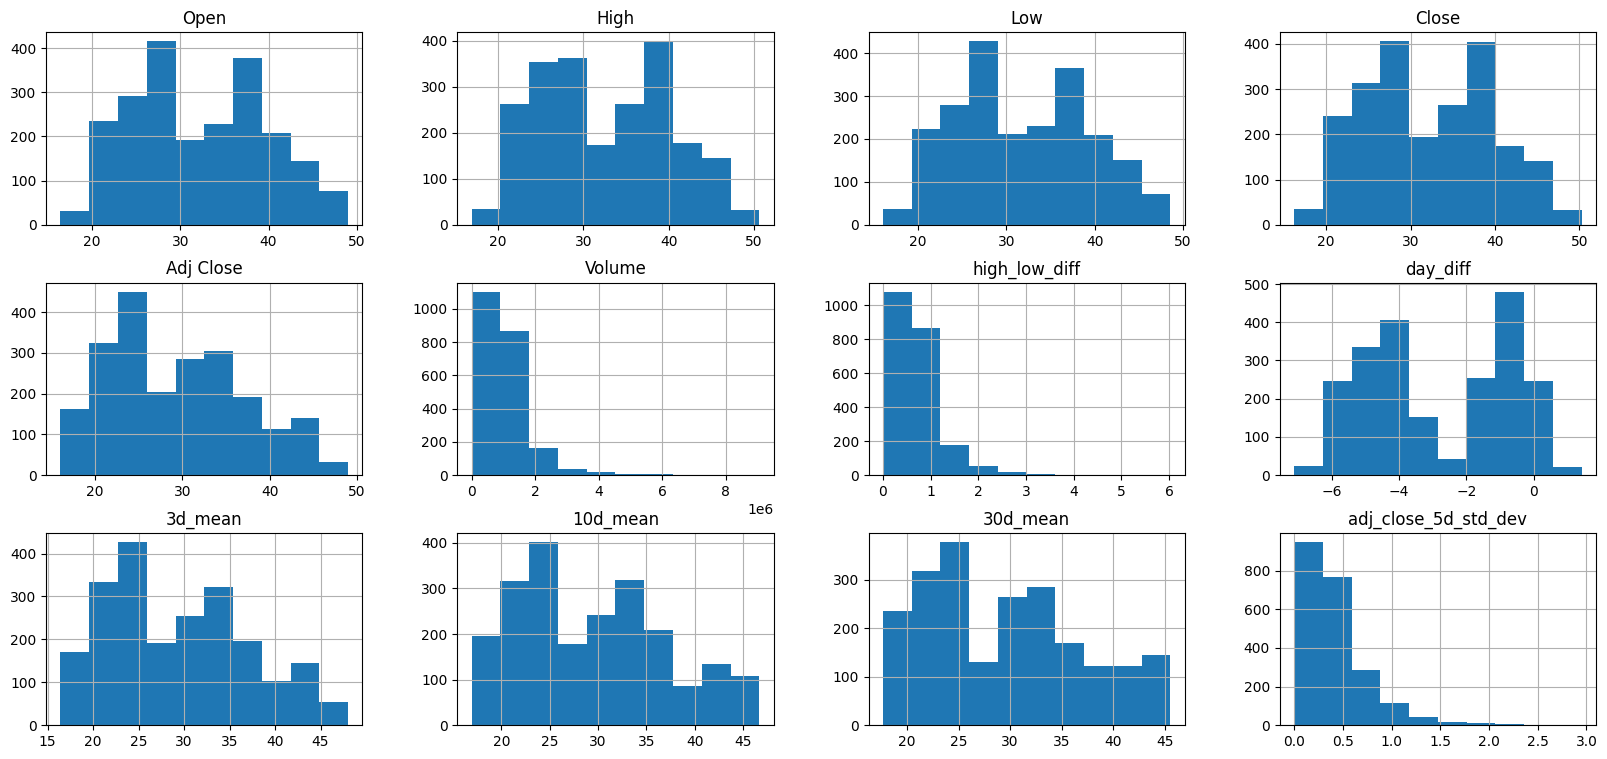

In [68]:
from matplotlib import pyplot as plt

alstom_df.hist(layout=(3,4), column= feature_list)

# the default size is not so pretty
fig = plt.gcf()
fig.set_size_inches(20,9)

### 3.4 Get the density of each feature

ModuleNotFoundError: No module named 'scipy'

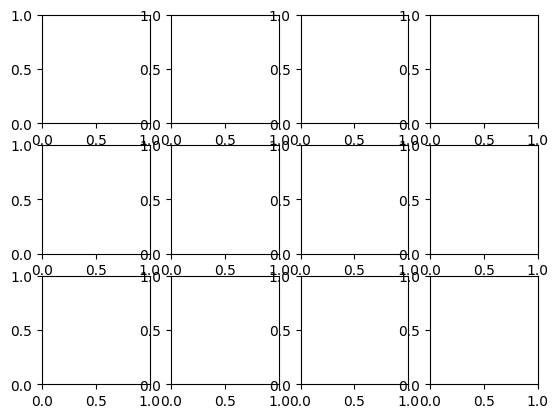

In [73]:

alstom_df[feature_list].plot(kind="density", subplots=True, layout=(3,4),sharex=False)

### get the relation between features


/home/pengfei/.cache/pypoetry/virtualenvs/python-finance-GYfqctcg-py3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


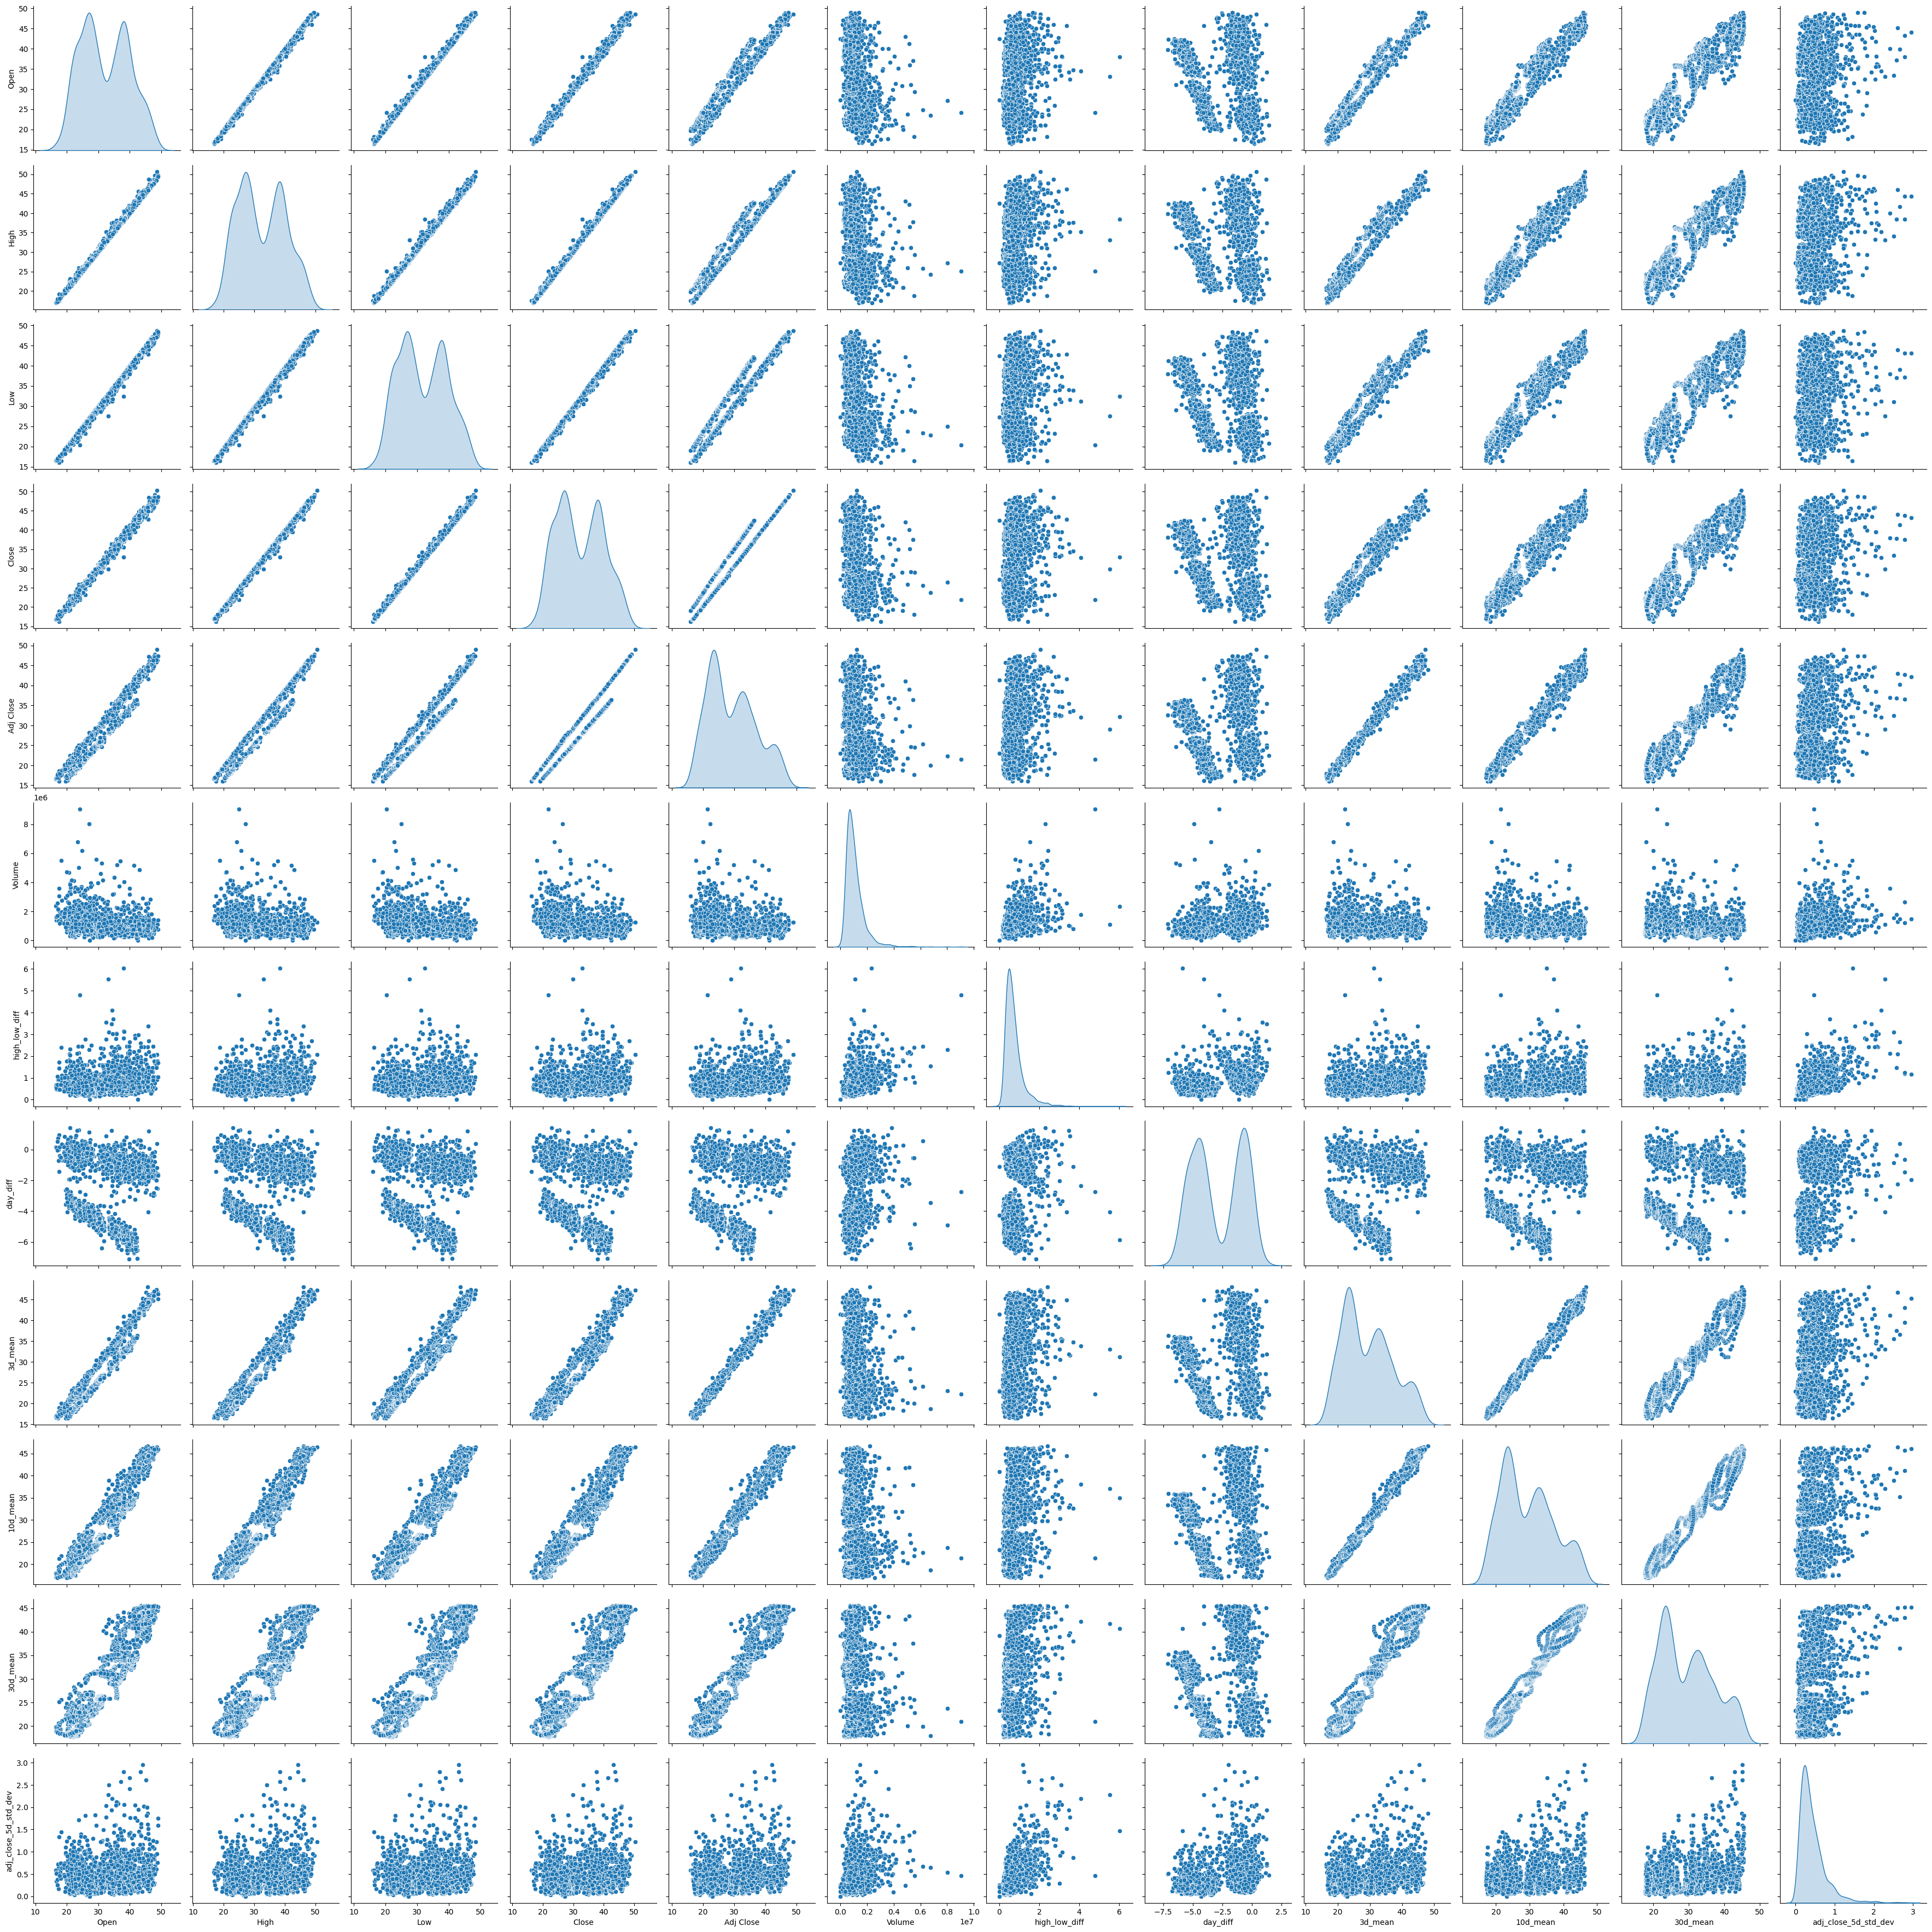

In [75]:
sns.pairplot(alstom_df[feature_list],height=3,diag_kind="kde")

## 4. Get the feature importance of each column

There are many ways to calculate the feature importance of a column


### 4.1 Use regression coefficient to determine the importance

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LarsCV
alstom_df = alstom_df.dropna()

Y = alstom_df["Adj Close"].values
X = alstom_df.values
colNames= alstom_df.columns
ranks = {}

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(
        order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2),ranks)
    res = dict(zip(names,ranks))
    return res

In [82]:
lr = LinearRegression()
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_),colNames)

# ridge
ridge = Ridge(alpha = 7 )
ridge.fit(X,Y)
ranks["Ridge"] = ranking(np.abs(ridge.coef_),colNames)

lasso=Lasso(alpha=.05)
lasso.fit(X,Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colNames)

/home/pengfei/.cache/pypoetry/virtualenvs/python-finance-GYfqctcg-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+02, tolerance: 1.280e+01
  model = cd_fast.enet_coordinate_descent(


In [83]:
print(ranks)

{'LinReg': {'Open': 0.5, 'High': 0.0, 'Low': 0.0, 'Close': 0.0, 'Adj Close': 1.0, 'Volume': 0.0, 'ewm': 0.0, 'high_low_diff': 0.0, 'day_diff': 0.5, '3d_mean': 0.0, '10d_mean': 0.0, '30d_mean': 0.0, 'adj_close_5d_std_dev': 0.0}, 'Ridge': {'Open': 0.48, 'High': 0.02, 'Low': 0.01, 'Close': 0.01, 'Adj Close': 1.0, 'Volume': 0.0, 'ewm': 0.03, 'high_low_diff': 0.0, 'day_diff': 0.52, '3d_mean': 0.02, '10d_mean': 0.02, '30d_mean': 0.01, 'adj_close_5d_std_dev': 0.0}, 'Lasso': {'Open': 0.1, 'High': 0.03, 'Low': 0.0, 'Close': 0.0, 'Adj Close': 1.0, 'Volume': 0.0, 'ewm': 0.0, 'high_low_diff': 0.0, 'day_diff': 0.12, '3d_mean': 0.01, '10d_mean': 0.0, '30d_mean': 0.0, 'adj_close_5d_std_dev': 0.0}}
